<a href="https://colab.research.google.com/github/ethanmjansen/DS-Unit-2-Applied-Modeling/blob/master/module4/LS_DS10_234_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

#My Data Prework

In [0]:
#Initial Imports
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
!pip install category_encoders==2.*
!pip install eli5
!pip install pdpbox
!pip install shap

In [3]:
uploaded = files.upload()

Saving 2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv to 2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv


In [0]:
df = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')

In [137]:
df.head(2)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,Combination of Primary and Highlight Color,Color notes,Location,Above Ground Sighter Measurement,Specific Location,Running,Chasing,Climbing,Eating,Foraging,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,Gray+Cinnamon,NaN,Ground Plane,FALSE,NaN,True,False,False,False,False,NaN,False,False,False,False,False,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13


#Define Target

In [0]:
#Brief Clean to Define Target
indexNames = df[ (df['Runs from'] == True) & (df['Indifferent'] == True) ].index
df.drop(indexNames , inplace=True)

In [141]:
#This is my target
df['Target'] = df['Approaches'] | df['Indifferent'] == True
df['Target'].value_counts()

True     1581
False    1410
Name: Target, dtype: int64

#Baseline Metric

In [142]:
print(df['Target'].value_counts(max))
print(f'If I only guessed Majority Class I would be \nright only 52.9% of the time')

True     0.528586
False    0.471414
Name: Target, dtype: float64
If I only guessed Majority Class I would be 
right only 52.9% of the time


#First Fast Model 

In [143]:
#Train Test Split Classifier
from sklearn.model_selection import train_test_split
#The actual Split
train, test = train_test_split(df, 
                               train_size=0.80,
                               test_size=0.20,
                               random_state=42)

#Train/Val/Test Split
train, val = train_test_split(train, 
                               train_size=0.80,
                               test_size=0.20,
                               random_state=42)

train.shape,val.shape, test.shape

((1913, 37), (479, 37), (599, 37))

In [0]:
#Model Imports
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [0]:
#Make X features Matrix and y vector 
#columns_to_drop = ['Unique Squirrel ID', 'Date', 'Color notes', 'Above Ground Sighter Measurement', 'Specific Location', 'Other Activities', 'Approaches', 'Indifferent', 'Runs from', 'Other Interactions', 'Lat/Long', 'Zip Codes','Target']
columns_to_drop = ['Unique Squirrel ID', 'Approaches', 'Indifferent', 'Runs from', 'Target']
target = 'Target'
X_train = train.drop(columns=columns_to_drop)
y_train = train[target]
X_val = val.drop(columns=columns_to_drop)
y_val = val[target]
X_test = test

In [0]:
#Make Pipeline
pipeline = make_pipeline(ce.OrdinalEncoder(), 
                         SimpleImputer(strategy='mean'), 
                         RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=27))

In [147]:
# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.6722338204592901


#Partial Dependence Plots

##One Isolated Feature

In [0]:
#Imports
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot
#So the Graphs aren't fuzzy 
plt.rcParams['figure.dpi'] = 72

In [0]:
#First Isolated Feature 

feature = 'X'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

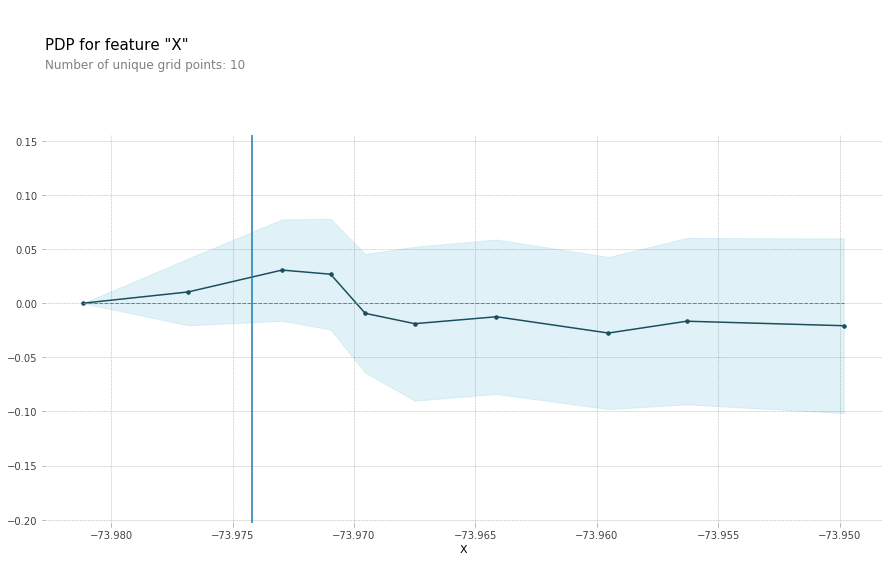

In [153]:
#PDP plot for X
ax1 = pdp_plot(isolated, feature_name=feature)
plt.axvline(-73.9741874);

In [0]:
#Second Isolated Feature
feature = 'Y'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

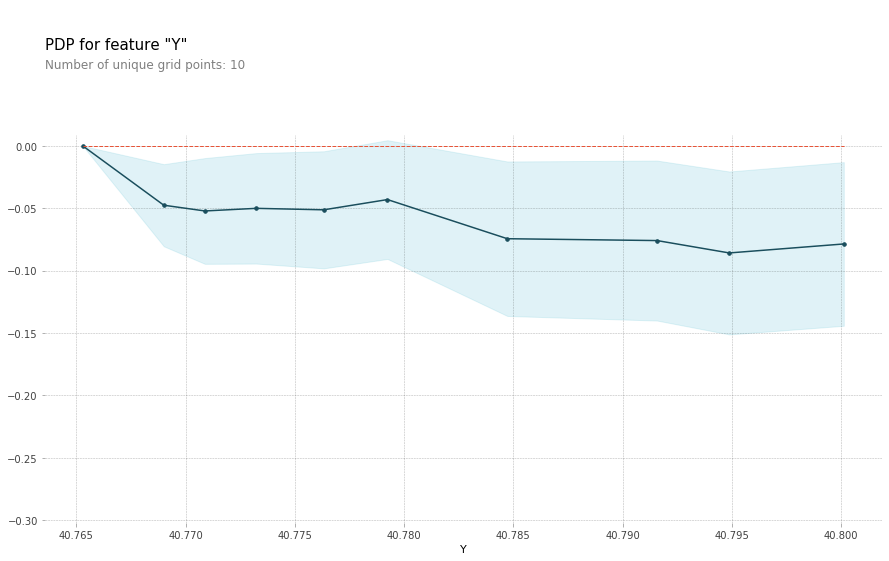

In [19]:
#PDP plot for Y
pdp_plot(isolated, feature_name=feature);

##Two Isolated Features

In [0]:
#Imports 
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [0]:
#First Comparison
features = ['X', 'Y']

interaction = pdp_interact(
    model=pipeline,
    dataset=X_val, 
    model_features=X_val.columns, 
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


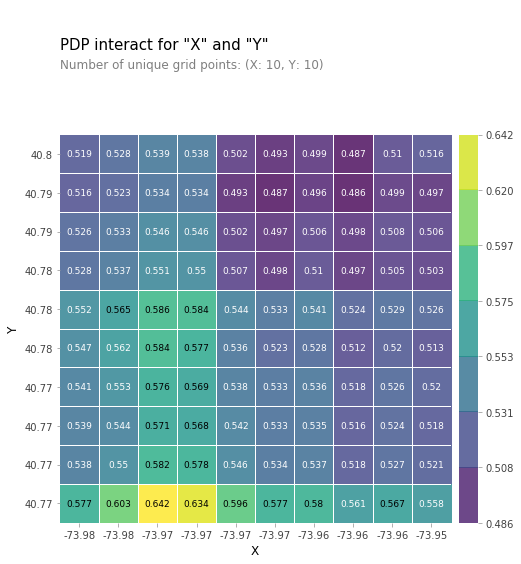

In [24]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [0]:
import seaborn as sns

In [133]:
df2.head(2)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Combination of Primary and Highlight Color,Running,Chasing,Climbing,Eating,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Lat/Long,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Target
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,+,False,False,False,False,False,False,False,False,False,False,False,False,False,POINT (-73.9561344937861 40.7940823884086),19,4,19,13,False
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Gray+Cinnamon,True,False,False,False,False,False,False,False,False,False,False,False,True,POINT (-73.9570437717691 40.794850940803904),19,4,19,13,False


In [0]:
#Creating new df for categorical isolated features
df2 = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')

In [0]:
#Brief Clean to Define Target
indexNames = df2[ (df2['Runs from'] == True) & (df2['Indifferent'] == True) ].index
df2.drop(indexNames , inplace=True)

In [127]:
#This is my target
df2['Target'] = df2['Approaches'] | df2['Indifferent'] == True
df2['Target'].value_counts()

True     1581
False    1410
Name: Target, dtype: int64

In [129]:
df2 = df2.dropna(axis=1)

target = 'Target'
features = df2.columns.drop(['Unique Squirrel ID', 'Approaches', 'Indifferent', 'Runs from'])

X = df2[features]
y = df2[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

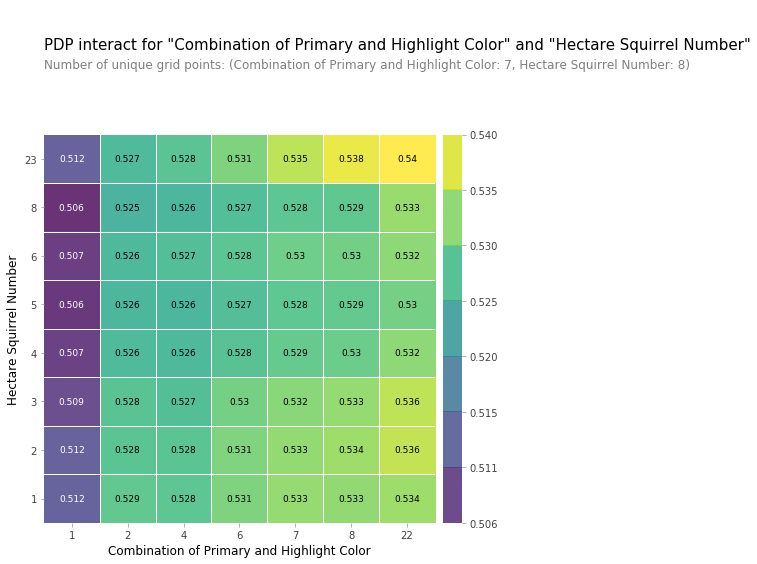

In [134]:
features = ['Combination of Primary and Highlight Color', 'Hectare Squirrel Number']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

#Shapley Force Plots

In [0]:
#Imports
import shap
from xgboost import XGBClassifier

In [0]:
#I need to make a new model that works with Shap values
processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

In [46]:
#My Isolate Row
row = X_train.iloc[[320]]
row

,X,Y,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,Combination of Primary and Highlight Color,Color notes,Location,Above Ground Sighter Measurement,Specific Location,Running,Chasing,Climbing,Eating,Foraging,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Other Interactions,Lat/Long,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
1378,-73.979647,40.767837,01C,PM,10132018,8,Adult,Cinnamon,NaN,Cinnamon+,NaN,Ground Plane,FALSE,NaN,False,False,False,False,True,NaN,False,False,False,False,False,NaN,POINT (-73.9796470494747 40.7678370925485),NaN,19,4,19,13


In [47]:
#Explanation for Shap value
explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # For classification, this shows predicted probabilities
)

# Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

# If you're working locally:
else:
    DATA_PATH = '../data/'